<a href="https://colab.research.google.com/github/swanandiparnaik/DS_assignment/blob/main/a_decisiontree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#getting information of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

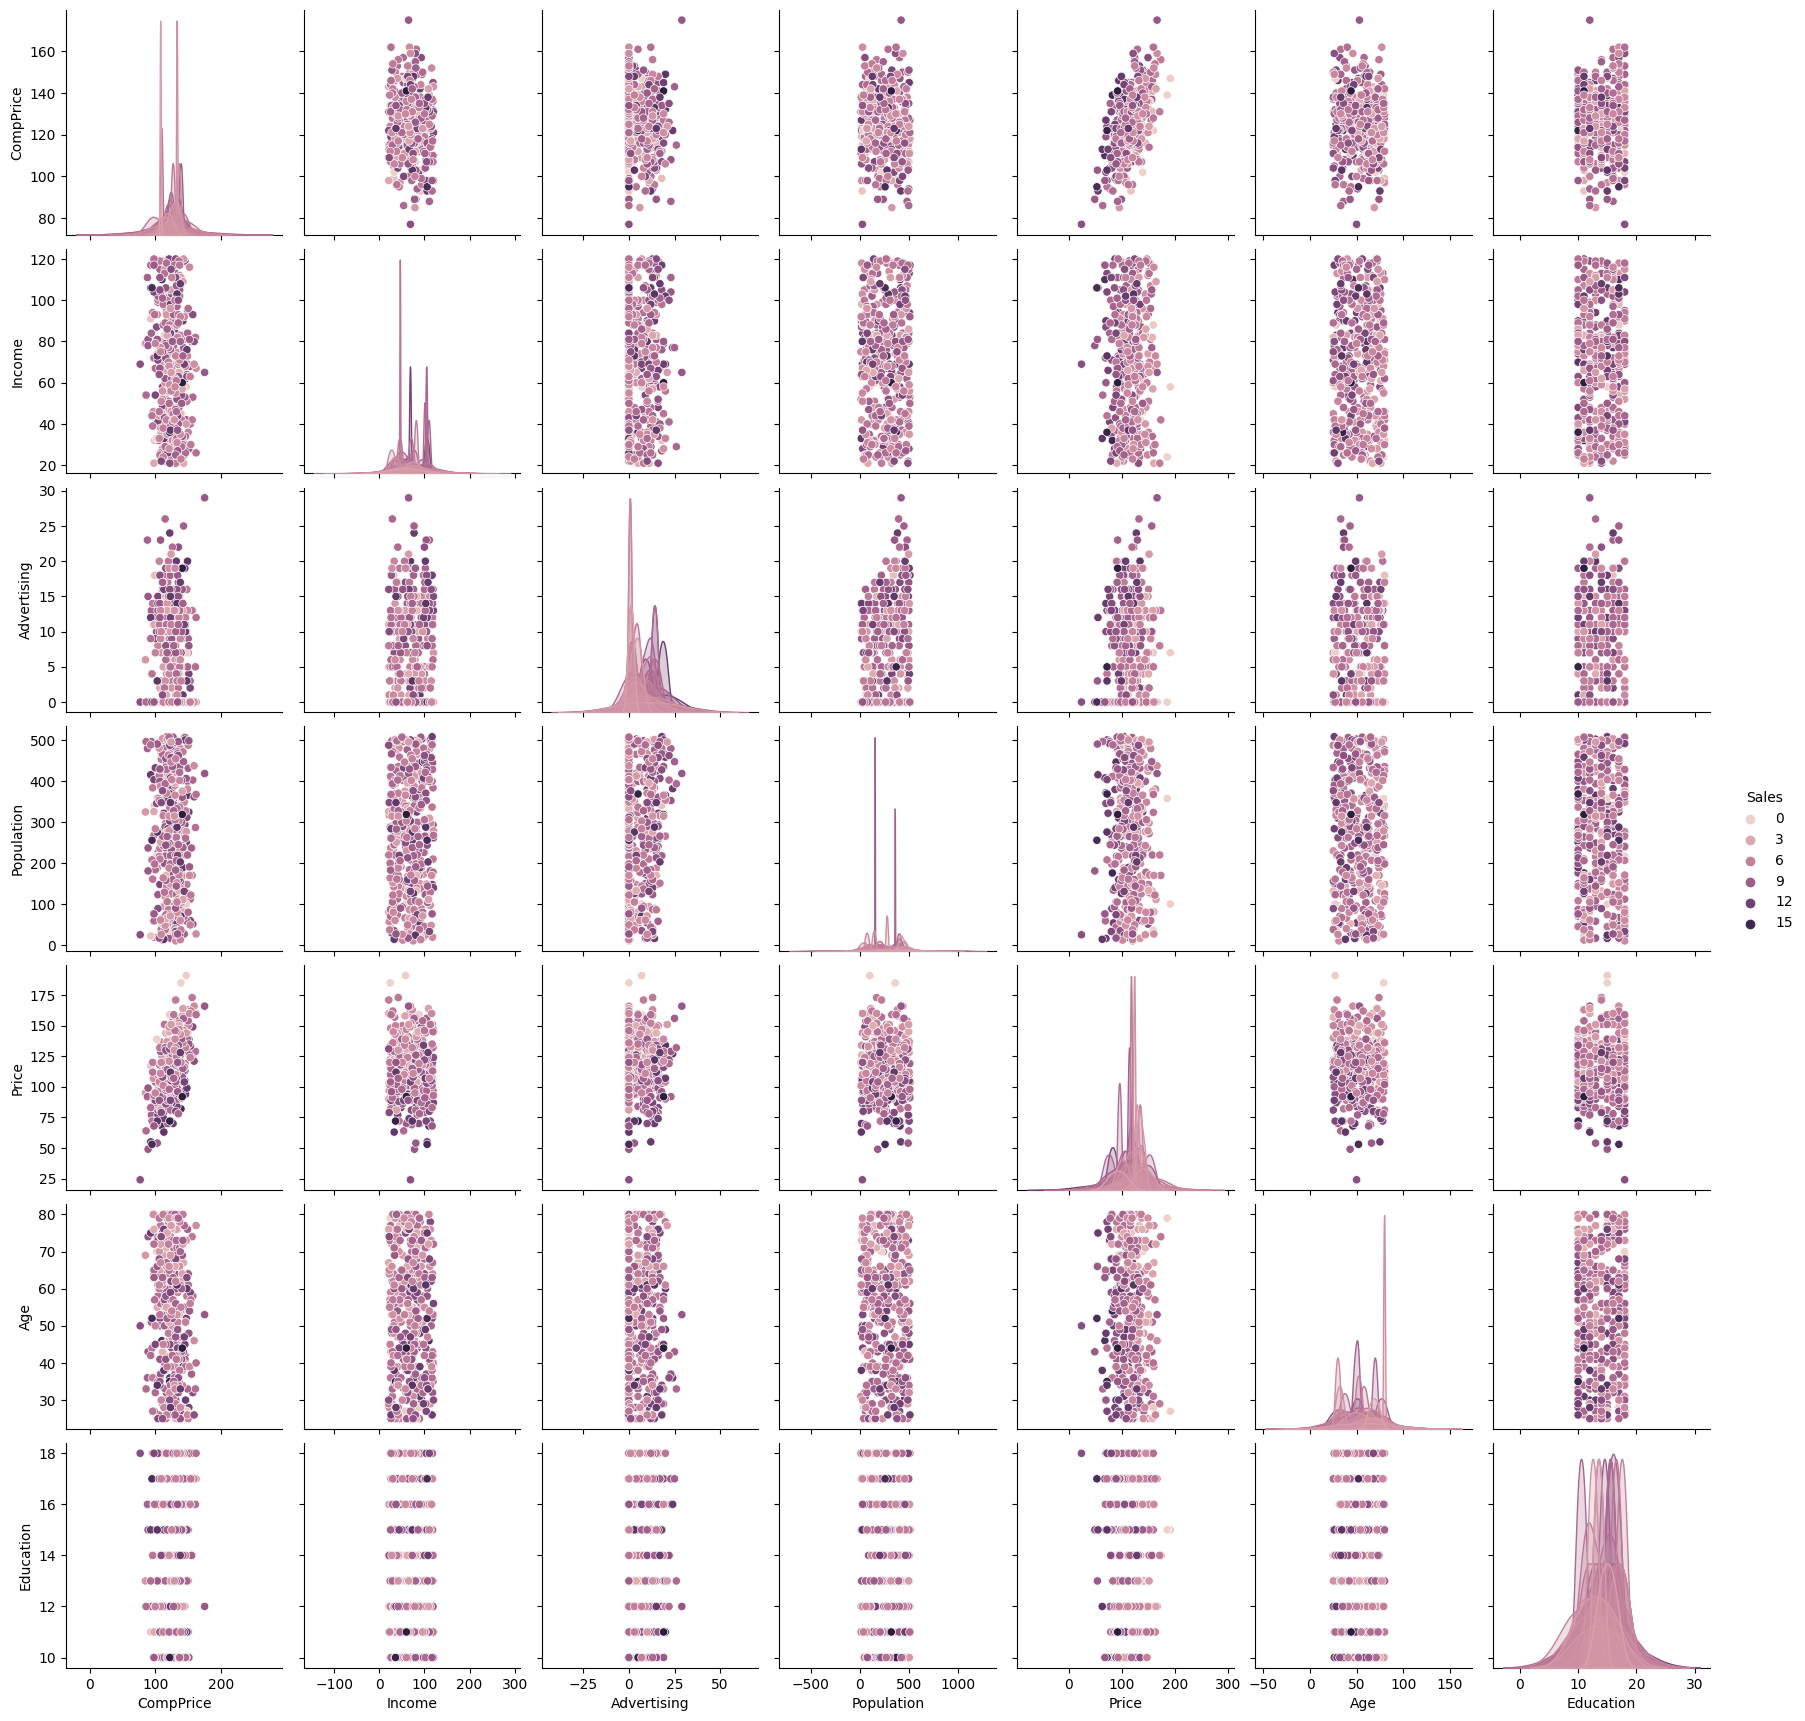

In [6]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Sales')

In [8]:
##Find the average sales and classifying the categories that are greater than the average sales value, as the fast moving product segment
df["sales"]=(df["Sales"]>7.49)*1

In [12]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])

In [15]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,sales,Urban_1,US_1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,0,1,1
4,4.15,141,64,3,340,128,0,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,0,1
397,7.41,162,26,12,368,159,2,40,18,0,1,1
398,5.94,100,79,7,284,95,0,50,12,0,1,1


In [17]:
df.drop(["Sales"],axis=1,inplace=True)
#Dropping the sales column from the data, since it is the target variable, 'y'

In [19]:
#Splitting the data into independent and target variables
x=df.iloc[:,0:10]
y=df.iloc[:,10]

In [20]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [ ]:
##Creating a Decision tree classifier model with a depth of 3 and fitting the data on the model

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

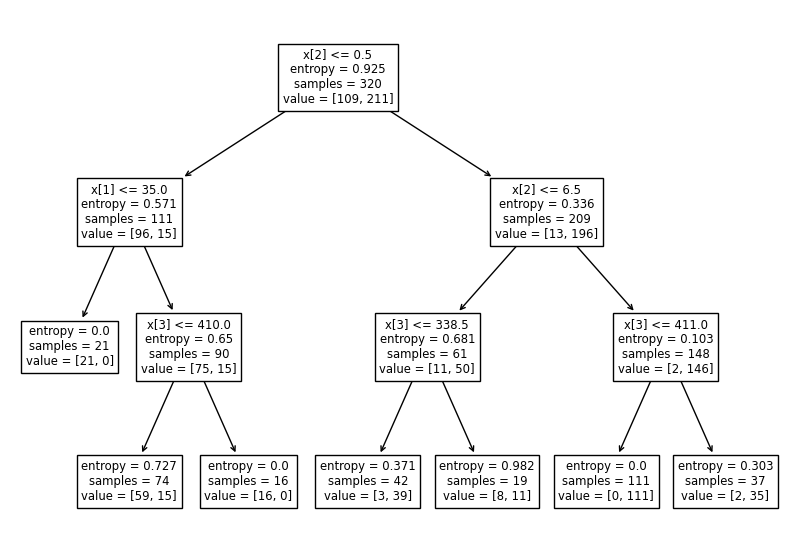

In [24]:
plt.figure(figsize=(10,7))
tree.plot_tree(model);

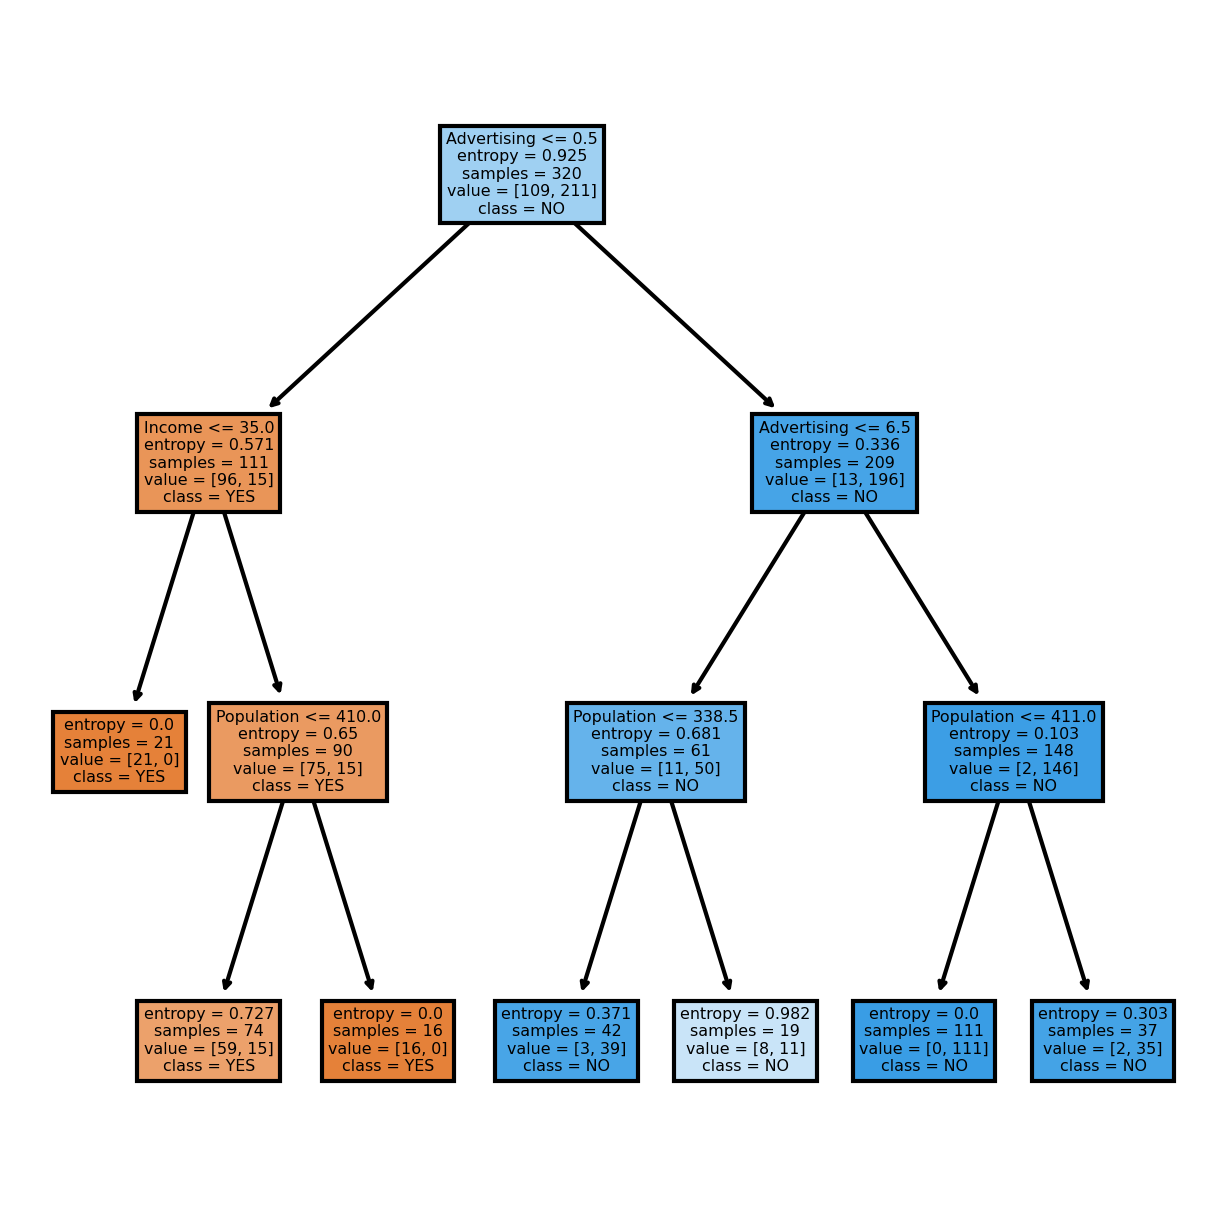

In [25]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [26]:
model.score(x_train, y_train)
##check score of training data

0.9125

In [27]:
preds = model.predict(x_test)

In [28]:
np.mean(preds==y_test)

0.9

In [29]:
model.score(x_test, y_test)
###check score of test data

0.9

In [30]:
model.feature_importances_

array([0.        , 0.02498681, 0.89361986, 0.08139333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [31]:
y_pred = preds
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.9)

In [35]:
model.predict_proba(x_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.42105263, 0.57894737],
       [0.7972973 , 0.2027027 ],
       [0.05405405, 0.94594595],
       [0.7972973 , 0.2027027 ],
       [0.7972973 , 0.2027027 ],
       [1.        , 0.        ],
       [0.05405405, 0.94594595],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.05405405, 0.94594595],
       [0.07142857, 0.92857143],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7972973 , 0.2027027 ],
       [0.        , 1.        ],
       [0.7972973 , 0.2027027 ],
       [0.7972973 , 0.2027027 ],
       [0.7972973 , 0.2027027 ],
       [0.7972973 , 0.2027027 ],
       [0.        , 1.        ],
       [0.7972973 , 0.2027027 ],
       [0.        , 1.        ],
       [0.05405405, 0.94594595],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.7972973 , 0.2027027 ],
       [0.        , 1.        ],
       [1.

In [32]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
US_1,,
0,29,4
1,4,43


In [ ]:
##Building Decision Tree Classifier (CART) using Gini Criteria

In [33]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [34]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9

In [ ]:
#Decision Tree Regression Example

In [37]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [39]:
array = df.values
X = array[:,1:6]
y = array[:,0]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [41]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
#Find the accuracy
model.score(X_test,y_test)

-0.1554616269020377